In [1]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd

import os
import numpy as np
from pprint import pprint 
import matplotlib.pyplot as plt
import random
import acquire as a
import nltk
import re
from nltk.tokenize import ToktokTokenizer

# ACQUIRE

In [2]:
user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36",
    "Chrome/91.0.4472.124"
    # Add more User-Agent strings as needed
]

In [3]:

start_page = 20
end_page = 49
base_url = "https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories"

links = []

# Iterate over each page
for page in range(start_page, end_page + 1):
    url = f"{base_url}&p={page}"
    headers = {"User-Agent": random.choice(user_agents)}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    repo_items = soup.find_all('li', class_='repo-list-item')

    for link in repo_items:
        link_href = link.a.attrs['href'].lstrip('/')  # Remove forward slash at the beginning of the link
        links.append(link_href)

# Print all the links
for link in links:
    len(links)
    pprint(link)
    print()


'kunal-kushwaha/DSA-Bootcamp-Java'

'jenkinsci/jenkins'

'forezp/SpringCloudLearning'

'hashicorp/terraform-provider-aws'

'learn-co-students/python-variables-lab-data-science-intro-000'

'ant-design/ant-design-pro'

'discourse/discourse'

'bilibili/ijkplayer'

'prakhar1989/awesome-courses'

'adobe/brackets'

'firebase/quickstart-android'

'sudheerj/reactjs-interview-questions'

'trimstray/the-book-of-secret-knowledge'

'commaai/openpilot'

'education/GitHubGraduation-2021'

'GoogleChrome/chrome-extensions-samples'

'juice-shop/juice-shop'

'learn-co-students/python-lists-readme-data-science-intro-000'

'alibaba/canal'

'tensorflow/examples'

'learn-co-curriculum/phase-0-html-issue-bot-9000-lab'

'jenkins-docs/simple-node-js-react-npm-app'

'nestjs/nest'

'linlinjava/litemall'

'wangzheng0822/algo'

'gothinkster/realworld'

'lodash/lodash'

'angular-ui/bootstrap'

'algorithm-visualizer/algorithm-visualizer'

'learn-co-students/js-from-dom-to-node-bootcamp-prep-000'

'alibaba/canal'

'P

In [4]:
len(links)

90

In [5]:
links

['kunal-kushwaha/DSA-Bootcamp-Java',
 'jenkinsci/jenkins',
 'forezp/SpringCloudLearning',
 'hashicorp/terraform-provider-aws',
 'learn-co-students/python-variables-lab-data-science-intro-000',
 'ant-design/ant-design-pro',
 'discourse/discourse',
 'bilibili/ijkplayer',
 'prakhar1989/awesome-courses',
 'adobe/brackets',
 'firebase/quickstart-android',
 'sudheerj/reactjs-interview-questions',
 'trimstray/the-book-of-secret-knowledge',
 'commaai/openpilot',
 'education/GitHubGraduation-2021',
 'GoogleChrome/chrome-extensions-samples',
 'juice-shop/juice-shop',
 'learn-co-students/python-lists-readme-data-science-intro-000',
 'alibaba/canal',
 'tensorflow/examples',
 'learn-co-curriculum/phase-0-html-issue-bot-9000-lab',
 'jenkins-docs/simple-node-js-react-npm-app',
 'nestjs/nest',
 'linlinjava/litemall',
 'wangzheng0822/algo',
 'gothinkster/realworld',
 'lodash/lodash',
 'angular-ui/bootstrap',
 'algorithm-visualizer/algorithm-visualizer',
 'learn-co-students/js-from-dom-to-node-bootcamp-

In [6]:
df=pd.read_json('data2.json')
df.head()

,repo,language,readme_contents
0,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
1,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...
2,Pierian-Data/Complete-Python-3-Bootcamp,Jupyter Notebook,# Complete-Python-3-Bootcamp\nCourse Files for...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,rdpeng/ExData_Plotting1,None,## Introduction\n\nThis assignment uses data f...


In [7]:
df.language.value_counts()

JavaScript          36
Python              16
HTML                15
Java                14
TypeScript          14
Jupyter Notebook    14
Go                   7
C                    6
Ruby                 5
CSS                  4
C++                  3
Shell                3
C#                   3
Rust                 2
Vue                  2
Dockerfile           2
SCSS                 2
Kotlin               2
PHP                  2
Objective-C          2
Starlark             1
Markdown             1
CoffeeScript         1
Dart                 1
TeX                  1
Name: language, dtype: int64

# PREPARATION

In [8]:
def clean(text: str) -> list: 
    """A simple function to cleanup text data"""
    
    #remove non-ascii characters & lower
    text = (text.encode('ascii', 'ignore')
                .decode('utf-8', 'ignore')
                .lower())
    
    #remove special characters
    words = re.sub(r'[^\w\s]', ' ', text).split()
    
    #build the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    #getting all stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [9]:
def tokenize(text):
    """
    Tokenizes the words in the input string.
    """
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

In [10]:
df['clean_contents'] = df.readme_contents.apply(tokenize).apply(' '.join)
df['clean_contents'] = df.clean_contents.apply(clean).apply(' '.join)

In [11]:
df.head()

,repo,language,readme_contents,clean_contents
0,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...
1,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...,collection gitignore template github collectio...
2,Pierian-Data/Complete-Python-3-Bootcamp,Jupyter Notebook,# Complete-Python-3-Bootcamp\nCourse Files for...,complete python 3 bootcamp course file complet...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p align center href http getbootstrap com img ...
4,rdpeng/ExData_Plotting1,None,## Introduction\n\nThis assignment uses data f...,introduction assignment us data href http arch...


In [12]:
df.language.value_counts().nunique()

11

In [13]:
df.language.unique()

array(['HTML', None, 'Jupyter Notebook', 'JavaScript', 'Java', 'C',
       'TypeScript', 'PHP', 'Ruby', 'Python', 'C++', 'Dockerfile', 'Dart',
       'Markdown', 'Go', 'CSS', 'SCSS', 'Rust', 'CoffeeScript', 'Shell',
       'Vue', 'Objective-C', 'Kotlin', 'C#', 'Starlark', 'TeX'],
      dtype=object)

In [14]:
(df['language'] == 'JavaScript').mean()*100

20.0

In [15]:
15/70

0.21428571428571427

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             180 non-null    object
 1   language         159 non-null    object
 2   readme_contents  180 non-null    object
 3   clean_contents   180 non-null    object
dtypes: object(4)
memory usage: 5.8+ KB


In [17]:
languages_to_keep = ['JavaScript','Python','Java','TypeScript','HTML']
df['language'] = np.where(df['language'].isin(languages_to_keep), df['language'], 'Other')

In [18]:
df.head()

,repo,language,readme_contents,clean_contents
0,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...
1,github/gitignore,Other,# A collection of `.gitignore` templates\n\nTh...,collection gitignore template github collectio...
2,Pierian-Data/Complete-Python-3-Bootcamp,Other,# Complete-Python-3-Bootcamp\nCourse Files for...,complete python 3 bootcamp course file complet...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p align center href http getbootstrap com img ...
4,rdpeng/ExData_Plotting1,Other,## Introduction\n\nThis assignment uses data f...,introduction assignment us data href http arch...


In [19]:
df.language.value_counts()

Other         85
JavaScript    36
Python        16
HTML          15
Java          14
TypeScript    14
Name: language, dtype: int64

In [20]:
85/180

0.4722222222222222

In [21]:
def create_pie_chart(df, column_name,title):
    """ This function creates a pie chart for our categorical target variable"""
    values = df[column_name].value_counts()
    labels = values.index.tolist()
    sizes = values.tolist()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()
    

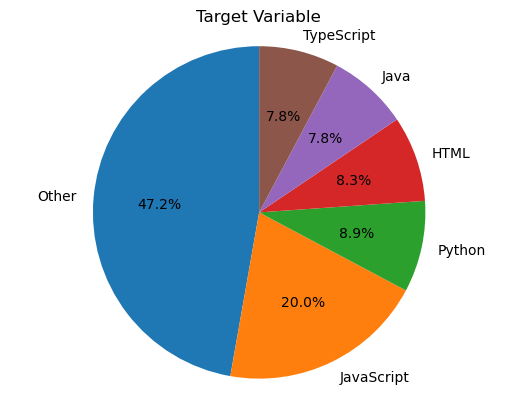

In [22]:
create_pie_chart(df,'language','Target Variable')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             180 non-null    object
 1   language         180 non-null    object
 2   readme_contents  180 non-null    object
 3   clean_contents   180 non-null    object
dtypes: object(4)
memory usage: 5.8+ KB


# Exploration

In [24]:
from sklearn.model_selection import train_test_split
def split_data(df,variable):
    """This function helps divide the data into train, validate, and testing"
    """
    train, test = train_test_split(df,
                                   random_state=123, test_size=.20, stratify= df[variable])
    train, validate = train_test_split(train, random_state=123, test_size=.25, stratify= train[variable])
    return train, validate, test

In [25]:
train,validate,test=split_data(df,'language')

In [26]:
train.head()

,repo,language,readme_contents,clean_contents
109,udacity/devops-intro-project,Other,Instructions for Practice Project\n===========...,instruction practice project instruction assum...
107,udacity/frontend-nanodegree-arcade-game,JavaScript,# Classic Arcade Game Clone Project\n\n## Tabl...,classic arcade game clone project table conten...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p align center href http getbootstrap com img ...
71,adam-p/markdown-here,JavaScript,# ![Markdown Here logo](https://raw.github.com...,markdown logo http raw github com adam p markd...
129,mdbootstrap/mdb-ui-kit,Other,"Bootstrap 5 UI KIT - 700+ components, plain Ja...",bootstrap 5 ui kit 700 component plain javascr...


In [27]:
JavaScript_words = clean(' '.join(train[train.language=='JavaScript']['clean_contents']))
Python_words = clean(' '.join(train[train.language=='Python']['clean_contents']))
Java_words = clean(' '.join(train[train.language=='Java']['clean_contents']))
TypeScript_words = clean(' '.join(train[train.language=='TypeScript']['clean_contents']))
HTML_words = clean(' '.join(train[train.language=='HTML']['clean_contents']))
Other_words = clean(' '.join(train[train.language=='Other']['clean_contents']))
all_words = clean(' '.join(train['clean_contents']))

In [28]:
JavaScript_words_freq = pd.Series(JavaScript_words).value_counts()
Python_words_freq = pd.Series(Python_words).value_counts()
Java_words_freq = pd.Series(Java_words).value_counts()
TypeScript_words_freq = pd.Series(TypeScript_words).value_counts()
HTML_words_freq = pd.Series(HTML_words).value_counts()
Other_words_freq = pd.Series(Other_words).value_counts()
all_words_freq = pd.Series(all_words).value_counts()

In [29]:
word_counts = pd.concat([JavaScript_words_freq, Python_words_freq, Java_words_freq,TypeScript_words_freq,HTML_words_freq, Other_words_freq, all_words_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['JavaScript','Python','Java','TypeScript','HTML', 'Other','All']

word_counts.head()

,JavaScript,Python,Java,TypeScript,HTML,Other,All
124,8321,456,0,1,0,1169,9947
top,1941,3,1,2,12,118,2077
content,965,14,3,3,27,185,1197
table,951,7,0,2,16,27,1003
http,694,926,225,305,406,6376,8932


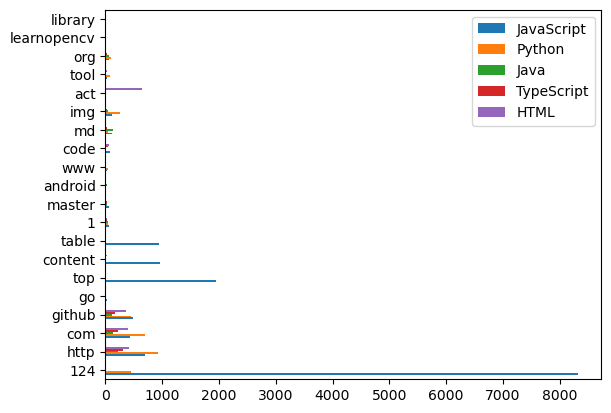

In [30]:
word_counts.sort_values('All', ascending=False)[['JavaScript','Python','Java','TypeScript','HTML']].head(20).plot.barh()
plt.show()

In [31]:
word_counts.sort_values('All', ascending=False).head(20)\
.apply(lambda row: row/row['All'], axis=1)

,JavaScript,Python,Java,TypeScript,HTML,Other,All
124,0.836534,0.045843,0.000000,0.000101,0.000000,0.117523,1.0
http,0.077698,0.103672,0.025190,0.034147,0.045455,0.713838,1.0
com,0.057364,0.092182,0.017876,0.029216,0.051894,0.751467,1.0
github,0.082612,0.076845,0.019508,0.029686,0.062595,0.728753,1.0
go,0.013122,0.000905,0.001810,0.004072,0.006787,0.973303,1.0
top,0.934521,0.001444,0.000481,0.000963,0.005778,0.056813,1.0
content,0.806182,0.011696,0.002506,0.002506,0.022556,0.154553,1.0
table,0.948156,0.006979,0.000000,0.001994,0.015952,0.026919,1.0
1,0.070499,0.049892,0.039046,0.022777,0.026030,0.791757,1.0
master,0.079183,0.030651,0.024266,0.031928,0.005109,0.828863,1.0


## 1.Are there any significant differences in the word frequencies between README files of different programming languages?

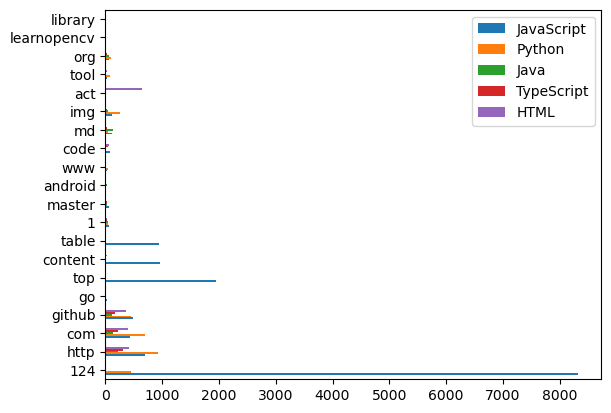

In [32]:
word_counts.sort_values('All', ascending=False)[['JavaScript','Python','Java','TypeScript','HTML']].head(20).plot.barh()
plt.show()

## 2. Does the presence of specific libraries in the README file correlate with the programming language used? ie. Pandas, dubbo, nbsp

In [62]:
JavaScript_words

['classic',
 'arcade',
 'game',
 'clone',
 'project',
 'table',
 'content',
 'instruction',
 'instruction',
 'contributing',
 'contributing',
 'instruction',
 'use',
 'rubric',
 'http',
 'review',
 'udacity',
 'com',
 'rubric',
 '15',
 'view',
 'self',
 'checking',
 'submission',
 'make',
 'sure',
 'function',
 'write',
 'object',
 'oriented',
 'either',
 'class',
 'function',
 'like',
 'player',
 'enemy',
 'class',
 'prototype',
 'function',
 'enemy',
 'prototype',
 'checkcollisions',
 'also',
 'make',
 'sure',
 'keyword',
 'used',
 'appropriately',
 'within',
 'class',
 'class',
 'prototype',
 'function',
 'refer',
 'object',
 'function',
 'called',
 'upon',
 'readme',
 'md',
 'file',
 'updated',
 'instruction',
 '1',
 'run',
 '2',
 'play',
 'arcade',
 'game',
 'detailed',
 'instruction',
 'get',
 'started',
 'check',
 'guide',
 'http',
 'doc',
 'google',
 'com',
 'document',
 '1v01ascpjswccwqlipfqvg3',
 'vxlh2e8_szqkc8jno0dc',
 'pub',
 'embedded',
 'true',
 'contributing',
 'reposit

In [61]:
JavaScript = ['zendesk', 'bootstrap', 'javascript', 'jquery']
JS_filtered_words = list(filter(lambda word: any(x in word for x in ['zendesk', 'bootstrap', 'j']), JavaScript))
print(JS_filtered_words)


['zendesk', 'bootstrap', 'javascript', 'jquery']


In [43]:
Java_words

['apache',
 'dubbo',
 'project',
 'build',
 'test',
 'pr',
 'http',
 'github',
 'com',
 'apache',
 'dubbo',
 'action',
 'workflow',
 'build',
 'test',
 'pr',
 'yml',
 'badge',
 'svg',
 'http',
 'github',
 'com',
 'apache',
 'dubbo',
 'action',
 'workflow',
 'build',
 'test',
 'pr',
 'yml',
 'codecov',
 'http',
 'codecov',
 'io',
 'gh',
 'apache',
 'dubbo',
 'branch',
 '3',
 '2',
 'graph',
 'badge',
 'svg',
 'http',
 'codecov',
 'io',
 'gh',
 'apache',
 'dubbo',
 'maven',
 'http',
 'img',
 'shield',
 'io',
 'maven',
 'central',
 'v',
 'org',
 'apache',
 'dubbo',
 'dubbo',
 'svg',
 'license',
 'http',
 'img',
 'shield',
 'io',
 'github',
 'license',
 'alibaba',
 'dubbo',
 'svg',
 'average',
 'time',
 'resolve',
 'issue',
 'http',
 'isitmaintained',
 'com',
 'badge',
 'resolution',
 'apache',
 'dubbo',
 'svg',
 'http',
 'isitmaintained',
 'com',
 'project',
 'apache',
 'dubbo',
 'average',
 'time',
 'resolve',
 'issue',
 'percentage',
 'issue',
 'still',
 'open',
 'http',
 'isitmaintained

In [60]:
J_filtered_list = [word for word in Java_words if word in ['dubbo', 'alibaba', 'apache']]
print(J_filtered_list)

['apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'dubbo', 'alibaba', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'alibaba', 'dubbo', 'alibaba', 'dubbo', 'apache', 'dubbo', 'dubbo', 'apache', 'apache', 'dubbo', 'dubbo', 'dubbo', 'dubbo', 'apache', 'dubbo', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'dubbo', 'apache', 'dubbo', 'dubbo', 'dubbo', 'apache', 'dubbo', 'dubbo', 'dubbo', 'dubbo', 'dubbo', 'apache', 'dubbo', 'dubbo', 'dubbo', 'apache', 'dubbo', 'dubbo', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'dubbo', 'dubbo', 'apache', 'dubbo', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache', 'dubbo', 'apache',

In [48]:
Python_words


['p',
 'align',
 'center',
 'href',
 'http',
 'www',
 'apachecn',
 'org',
 'img',
 'width',
 '200',
 'src',
 'doc',
 'img',
 'logo',
 'jpg',
 'br',
 'href',
 'http',
 'www',
 'apachecn',
 'org',
 'img',
 'src',
 'http',
 'img',
 'shield',
 'io',
 'badge',
 '3e',
 'home',
 'green',
 'svg',
 'href',
 'http',
 'home',
 'apachecn',
 'org',
 'img',
 'src',
 'http',
 'img',
 'shield',
 'io',
 'badge',
 '3e',
 'green',
 'svg',
 'href',
 'mailto',
 'apache',
 '163',
 'com',
 'img',
 'src',
 'http',
 'img',
 'shield',
 'io',
 'badge',
 '3e',
 'email',
 'green',
 'svg',
 'p',
 'h1',
 'align',
 'center',
 'href',
 'http',
 'github',
 'com',
 'apachecn',
 'ailearning',
 'ai',
 'learning',
 'h1',
 'cc',
 'nc',
 'sa',
 '4',
 '0',
 'http',
 'creativecommons',
 'org',
 'license',
 'nc',
 'sa',
 '4',
 '0',
 'deed',
 'zh',
 'stewart',
 'brand',
 'http',
 'ailearning',
 'apachecn',
 'org',
 'v1',
 'http',
 'alv1',
 'apachecn',
 'org',
 'quantlearning',
 'http',
 'qlearn',
 'apachecn',
 'org',
 'apachecn'

In [59]:
P_filtered_list = [word for word in Python_words if word in ['machine','learning', 'apache', 'apachecn']]
print(P_filtered_list)

['apachecn', 'apachecn', 'apachecn', 'apache', 'apachecn', 'learning', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'machine', 'learning', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'machine', 'learning', 'machine', 'learning', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'machine', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'apachecn', 'machine', 'learning', 'learning', 'learning']


In [33]:
TypeScript_words

['angular',
 'getting',
 'started',
 'material',
 'angular',
 'getting',
 'started',
 'http',
 'bit',
 'ly',
 'angular',
 'gettingstarted',
 'course',
 'pluralsight',
 'apm',
 'start',
 'starter',
 'file',
 'set',
 'course',
 'use',
 'code',
 'along',
 'course',
 'updated',
 'angular',
 'version',
 '14',
 'apm',
 'final',
 'completed',
 'file',
 'use',
 'see',
 'completed',
 'solution',
 'course',
 'updated',
 'angular',
 'version',
 '14',
 'apm',
 'final',
 'v16',
 'completed',
 'file',
 'upgraded',
 'angular',
 'v16',
 'note',
 'code',
 'match',
 'code',
 'along',
 'course',
 'use',
 'reference',
 'see',
 'readme',
 'md',
 'file',
 'folder',
 'detail',
 'installing',
 'running',
 'application',
 'problem',
 'installing',
 'running',
 'code',
 'please',
 'post',
 'discussion',
 'board',
 'course',
 'http',
 'app',
 'pluralsight',
 'com',
 'library',
 'course',
 'angular',
 '2',
 'getting',
 'started',
 'update',
 'discussion',
 'note',
 'installation',
 'tested',
 'using',
 'node',
 '

In [34]:
HTML_words

['user',
 'interface',
 'project',
 'great',
 'idea',
 'web',
 'page',
 'able',
 'create',
 'user',
 'interface',
 'scratch',
 'based',
 'design',
 'file',
 'considered',
 'basic',
 'necessity',
 'front',
 'end',
 'developer',
 'building',
 'single',
 'page',
 'website',
 'using',
 'html',
 'c',
 'given',
 'design',
 'file',
 'design',
 'file',
 'desktop',
 'jpg',
 'use',
 'html',
 'c',
 'build',
 'web',
 'page',
 'layout',
 'remember',
 'use',
 'display',
 'inline',
 'block',
 'box',
 'model',
 'c',
 'property',
 'project',
 'note',
 'permitted',
 'use',
 'flexbox',
 'c',
 'grid',
 'exercise',
 'basic',
 'layout',
 'technique',
 'lambda',
 'life',
 'tip',
 'use',
 'code',
 'instructor',
 'demonstration',
 'help',
 'tackle',
 'objective',
 'get',
 'started',
 'fork',
 'clone',
 'project',
 'directory',
 'machine',
 'open',
 'code',
 'preferred',
 'integrated',
 'development',
 'environment',
 'ide',
 'start',
 'objective',
 'objective',
 'project',
 'objective',
 'meant',
 'increase',


In [50]:
Other_words

['instruction',
 'practice',
 'project',
 'instruction',
 'assume',
 'familiarity',
 'git',
 'github',
 'comfortable',
 'tool',
 'please',
 'complete',
 'udacity',
 'use',
 'git',
 'github',
 'http',
 'www',
 'udacity',
 'com',
 'course',
 'use',
 'git',
 'github',
 'ud775',
 'course',
 'proceeding',
 'installing',
 'required',
 'tool',
 'need',
 'ensure',
 'computer',
 'find',
 'executables',
 'run',
 'might',
 'need',
 'modify',
 'path',
 'environment',
 'variable',
 'good',
 'overview',
 'superuser',
 'com',
 'http',
 'superuser',
 'com',
 'question',
 '284342',
 'path',
 'environment',
 'variable',
 'set',
 'use',
 'may',
 'need',
 'search',
 'web',
 'instruction',
 'set',
 'path',
 'variable',
 'specific',
 'operating',
 'system',
 'version',
 'setting',
 'local',
 'machine',
 'install',
 'virtualbox',
 'http',
 'www',
 'virtualbox',
 'org',
 'wiki',
 'downloads',
 'install',
 'vagrant',
 'http',
 'www',
 'vagrantup',
 'com',
 'downloads',
 'html',
 'install',
 'packer',
 'http',


In [58]:
O_filtered_list = [word for word in Other_words if word in ['virtualbox','vagrant']]
print(O_filtered_list)

['virtualbox', 'virtualbox', 'vagrant', 'virtualbox', 'virtualbox', 'virtualbox', 'virtualbox', 'virtualbox', 'virtualbox', 'virtualbox', 'vagrant', 'vagrant', 'vagrant']


In [39]:
A_filtered_list = [word for word in all_words if word in ['flexbox','chatgpt','cli','stackblitz','angular','apm','opencv','zendesk', 'bootstrap', 'jquery','virtualbox','vagrant','nbsp','machinelearning', 'apache','dubbo', 'alibaba','pandas','numpy']]
print(A_filtered_list)

['virtualbox', 'virtualbox', 'vagrant', 'virtualbox', 'virtualbox', 'virtualbox', 'virtualbox', 'virtualbox', 'virtualbox', 'virtualbox', 'vagrant', 'vagrant', 'vagrant', 'zendesk', 'zendesk', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', 'bootstrap', '

In [48]:
filtered_list_freq=pd.Series(A_filtered_list).value_counts()
filtered_list_freq

nbsp               356
bootstrap          304
chatgpt            254
opencv             245
apache             175
cli                173
dubbo              139
jquery              74
angular             19
virtualbox          10
stackblitz           8
apm                  8
alibaba              8
numpy                8
vagrant              4
machinelearning      2
zendesk              2
flexbox              1
dtype: int64

In [42]:
word_counts = pd.concat([JavaScript_words_freq, Python_words_freq, Java_words_freq,TypeScript_words_freq,HTML_words_freq, Other_words_freq,all_words_freq,filtered_list_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['JavaScript','Python','Java','TypeScript','HTML', 'Other','All','tools_frameworks']

word_counts.head()

,JavaScript,Python,Java,TypeScript,HTML,Other,All,tools_frameworks
124,8321,456,0,1,0,1169,9947,0
top,1941,3,1,2,12,118,2077,0
content,965,14,3,3,27,185,1197,0
table,951,7,0,2,16,27,1003,0
http,694,926,225,305,406,6376,8932,0


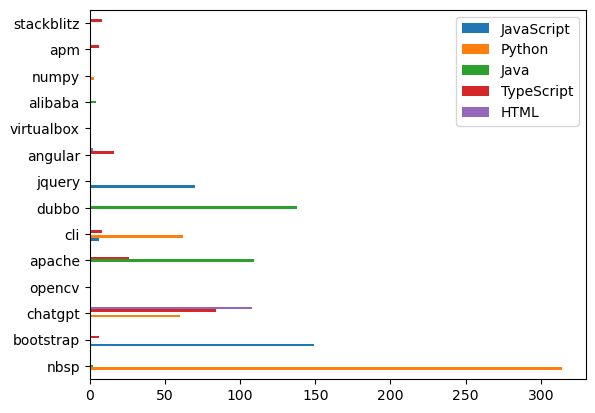

In [47]:
word_counts.sort_values('tools_frameworks', ascending=False)[['JavaScript','Python','Java','TypeScript','HTML']].head(14).plot.barh()
plt.show()

## 3. Most Common words on entire df and/or each language

In [49]:
words_to_remove = ["http", "com", "124","www","1","github","top","go","android","content","table","107","markdown"]
word_counts = word_counts[~word_counts.index.isin(words_to_remove)]


In [50]:
# Calculate the total count of words across all columns
word_counts['Total'] = word_counts.sum(axis=1)

# Sort the dataframe based on the 'Total' column in descending order
word_counts_sorted = word_counts.sort_values('Total', ascending=False)

# Extract the most used words
most_used_words = word_counts_sorted.index[:10]  # Change the number as per your requirement

pd.Series(most_used_words)


0         master
1           code
2             md
3            img
4            act
5           tool
6            org
7    learnopencv
8        library
9             io
dtype: object

In [51]:
most_used_words_per_column = word_counts.idxmax()
print(most_used_words_per_column)

JavaScript            stats
Python                 nbsp
Java                     md
TypeScript          chatgpt
HTML                    act
Other                master
All                  master
tools_frameworks       nbsp
Total                master
dtype: object


## 4. Least common words used on entire df and/or each language

In [52]:
least_used_words_per_column = word_counts.idxmin()
print(least_used_words_per_column)

JavaScript               nbsp
Python              shortcode
Java                    stats
TypeScript              stats
HTML                    stats
Other               shortcode
All                 precommit
tools_frameworks        stats
Total               precommit
dtype: object
